# Data Story Telling on the 50 most-followed TikTok accounts

In this notebook, we will be focusing on data visualization and drawing insights from the top 50 most-followed TikTok accounts. Due to the infinite evolution of e-commerce and digital marketing strategies, social media reputation have proved to be a vital part in every organizations. In fact, most medium to large organizations now resort to social media influencers as their primary marketing strategy. Due to this, knowing which influencer and how their funnels can help the organization is incredibly important. 

## 1.1 Import

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import string

The following table (tiktok_most_followed) lists the 50 most-followed accounts on TikTok, with each follower total rounded down to the nearest hundred thousand, as well as a description of each account and their country of origin.

In [2]:
tiktok = pd.read_csv('List of most-followed TikTok accounts.csv')
tiktok.head()

#Since rank represents the account ranking from 1-50, we cannot set it as the index

,Rank,Username,Owner,Followers\n(millions),Description,Country,Brand\nAccount
0,1,@khaby.lame,Khabane Lame,153.3,Social media personality,Italy Senegal,-
1,2,@charlidamelio,Charli D'Amelio,149.3,Dancer and social media personality,United States,-
2,3,@bellapoarch,Bella Poarch,92.5,Singer and social media personality,Philippines United States,-
3,4,@addisonre,Addison Rae,88.8,Social media personality and dancer,United States,-
4,5,@willsmith,Will Smith,72.9,Actor and film producer,United States,-


In [3]:
#Renaming columns
tiktok.columns = ['Rank', 'Username', 'Owner', 'Followers', 'Account_type', 'Country', 'Brand']

In [4]:
#Like every other datasets, checking for null values is a must
tiktok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          50 non-null     int64  
 1   Username      50 non-null     object 
 2   Owner         50 non-null     object 
 3   Followers     50 non-null     float64
 4   Account_type  50 non-null     object 
 5   Country       50 non-null     object 
 6   Brand         50 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.9+ KB


In [5]:
#Checking for unique values for each column
tiktok.nunique()

Rank            50
Username        50
Owner           50
Followers       50
Account_type    21
Country         21
Brand            2
dtype: int64

## 1.2 Exploration

If the Company can only choose 1 out of these 50 TikTok account to market their product, who would it be and why? The below exploratory data analysis will answer a series of question that could help stakeholders choose which accounts to contact.

### 1.2.1 What is the most popular account type among the 50 most-followed accounts?

To answer this, we will be plotting a bar chart of Type of Account vs. the Number of Followers

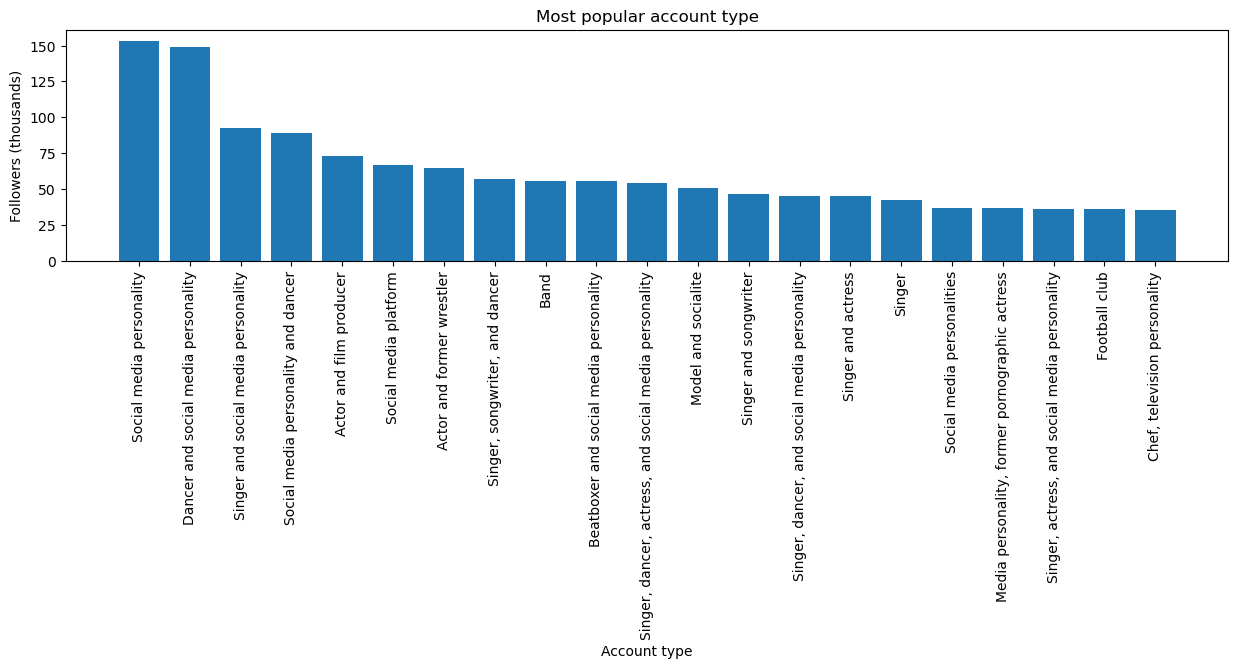

In [6]:
x_axis = tiktok['Account_type']
y_axis = tiktok['Followers']

plt.figure(figsize=(15,3))
plt.bar(x_axis, y_axis)
plt.title('Most popular account type')
plt.xlabel('Account type')
plt.ylabel('Followers (thousands)')
plt.xticks(rotation=90)
plt.show()

We can see that "Social media personality" is the most popular account type, but that doesn't really tell us what makes the account so appealing. We can also see that the word "Social media" appears in almost every categories. To confirm this, let's generate a word cloud in the next sub-section to see what's the most popular word.

### 1.2.2 Does the number followers correlate with the account identity?

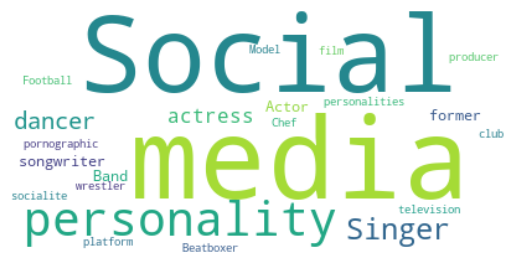

In [7]:
text = " ".join(cat for cat in tiktok.Account_type)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure()
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

The wordcloud above has proved that "social media" and "personality" are the most common descriptions for these accounts. Thus, having the account type as social media or personality, or both, do not generate much insights about the account holder and their potential customer reach. The Company needs to find an account that carries a certain niche, for example, we need a sport practicioner to advocate for sport drink, not a comedian.

In [8]:
#Dropping "social media" and "personality" from "Account type"
tiktok['Account_type'] = tiktok['Account_type'].str.lower()
tiktok['Account_type'] = tiktok['Account_type'].str.replace('social media','')
tiktok['Account_type'] = tiktok['Account_type'].str.replace('personality','')

#Dropping the stopword "and"
tiktok['Account_type'] = tiktok['Account_type'].str.replace('and','')

#Stripping leading and trailing whitespace from "Account_type" columns
tiktok['Account_type'] = tiktok['Account_type'].str.strip()

tiktok.head()

,Rank,Username,Owner,Followers,Account_type,Country,Brand
0,1,@khaby.lame,Khabane Lame,153.3,,Italy Senegal,-
1,2,@charlidamelio,Charli D'Amelio,149.3,dancer,United States,-
2,3,@bellapoarch,Bella Poarch,92.5,singer,Philippines United States,-
3,4,@addisonre,Addison Rae,88.8,dancer,United States,-
4,5,@willsmith,Will Smith,72.9,actor film producer,United States,-


Generating the wordcloud again to see the next most-followed account type

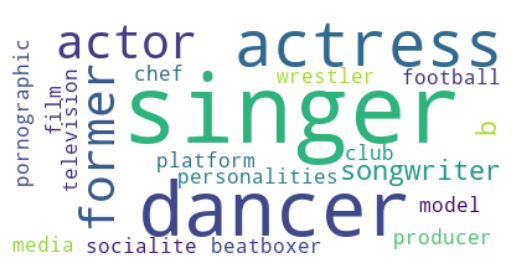

In [9]:
text = " ".join(cat for cat in tiktok.Account_type)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure()
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

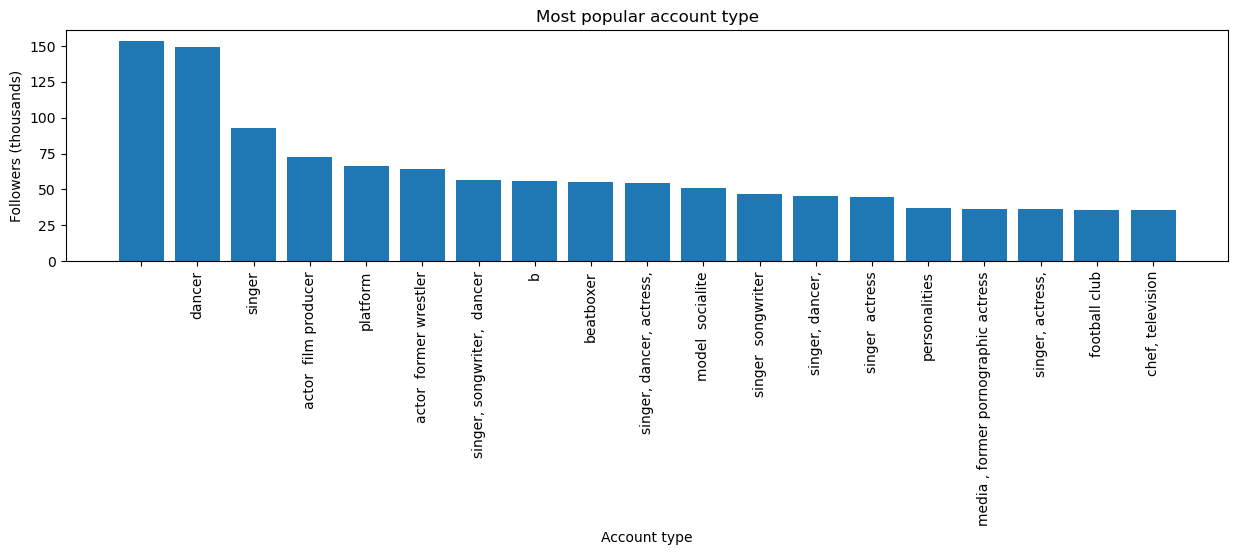

In [10]:
#Replotting the bar chart to see which type of social media personals have the most followers
x_axis = tiktok['Account_type']
y_axis = tiktok['Followers']

plt.figure(figsize=(15,3))
plt.bar(x_axis, y_axis)
plt.title('Most popular account type')
plt.xlabel('Account type')
plt.ylabel('Followers (thousands)')
plt.xticks(rotation=90)
plt.show()

Now that we know singer and dancer are the most-followed account type, let's find their locations!

### 1.2.3 Which country has the most-followed accounts?

In [11]:
#Look at the countries that these account-holders live in
popular_country = pd.concat([tiktok.Country.value_counts(), 100 * tiktok.Country.value_counts()/len(tiktok.Country)], axis=1)
popular_country.columns=['count','%']
popular_country.sort_values(by=['%'], ascending=False)

,count,%
United States,21,42.0
Mexico,5,10.0
South Korea,3,6.0
Russia,2,4.0
Japan,2,4.0
Colombia,2,4.0
India,1,2.0
Philippines United States,1,2.0
China,1,2.0
Turkey,1,2.0


In [12]:
#Resetting index to integers
popular_country = popular_country.reset_index()
popular_country.columns = ['Country','count','%']

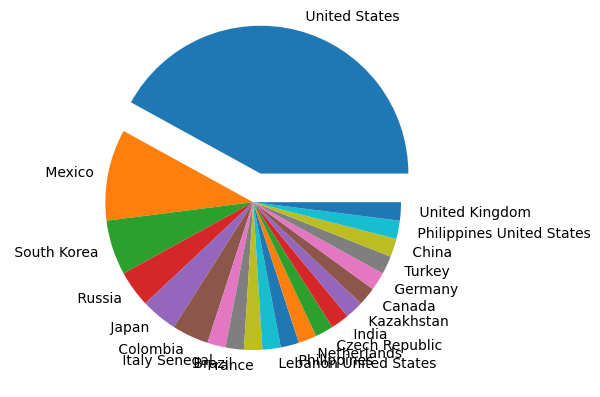

In [13]:
y = popular_country['%']
mylabels = popular_country['Country']
myexplode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

plt.pie(y, labels = mylabels, explode = myexplode)
plt.show() 